In [80]:
import numpy as np
import pandas as pd

# import the KNNimputer class
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

ModuleNotFoundError: No module named 'basemap'

In [58]:
import statistics
import matplotlib.pyplot as plt

In [82]:
import Basemap
# Aqui cargamos Basemap
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

ModuleNotFoundError: No module named 'Basemap'

In [83]:
import mplleaflet

ModuleNotFoundError: No module named 'mplleaflet'

In [84]:
import folium
from folium.plugins import HeatMap

ModuleNotFoundError: No module named 'folium'

In [2]:
bicisXcel20 = pd.read_excel('data/AccidentesBicicletas_2020.xlsx')
bicisXcel21 = pd.read_excel('data/AccidentesBicicletas_2021.xlsx')
bicisXcel22 = pd.read_excel('data/AccidentesBicicletas_2022.xlsx')
bicisXcel23 = pd.read_excel('data/AccidentesBicicletas_2023.xlsx')

# Leemos los valores del fichero y los cargamos en un dataframe
bicis20 = pd.DataFrame(bicisXcel20)
bicis21 = pd.DataFrame(bicisXcel21)
bicis22 = pd.DataFrame(bicisXcel22)
bicis23 = pd.DataFrame(bicisXcel23)

dfBicis = pd.concat([bicis20, bicis21, bicis22, bicis23])


In [3]:
dfBicisBackup = dfBicis

In [4]:
dfBicis = dfBicis.drop(['num_expediente', 'localizacion', 'numero', 'tipo_vehículo', 'tipo_vehiculo', 'cod_distrito', 'cod_lesividad'], axis=1)

In [5]:
dfBicis = dfBicis.dropna(subset = ['distrito', 'coordenada_y_utm', 'coordenada_x_utm', 'positiva_alcohol'])

In [6]:
dfBicis['positiva_droga'] = dfBicis['positiva_droga'].fillna(0)

In [7]:
dfBicis.rename(columns={'tipo_accidente':'accidente',
                        'estado_meteorológico':'meteorología',
                        'rango_edad':'edad',
                        'positiva_alcohol':'alcohol',
                        'positiva_droga':'droga'},
               inplace=True)

In [8]:
dfBicis['year'] = [t.year for t in pd.DatetimeIndex(dfBicis.fecha)]
dfBicis['year'] = dfBicis['year'].map({2020:2020, 2021:2021, 2022:2022, 2023:2023})

In [10]:
dfBicis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14781 entries, 0 to 12187
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             14781 non-null  datetime64[ns]
 1   hora              14781 non-null  object        
 2   distrito          14781 non-null  object        
 3   accidente         14781 non-null  object        
 4   meteorología      14781 non-null  object        
 5   tipo_persona      14781 non-null  object        
 6   edad              14781 non-null  object        
 7   sexo              14781 non-null  object        
 8   lesividad         14781 non-null  object        
 9   coordenada_x_utm  14781 non-null  float64       
 10  coordenada_y_utm  14781 non-null  float64       
 11  alcohol           14781 non-null  object        
 12  droga             14781 non-null  float64       
 13  year              14781 non-null  int64         
dtypes: datetime64[ns](1), 

In [11]:
dfBicis = dfBicis.drop(dfBicis[dfBicis['sexo']=='Desconocido'].index)

In [12]:
dfBicis = dfBicis.drop(dfBicis[dfBicis['edad']=='Desconocido'].index)

In [14]:
dfBicis['hour'] = pd.to_datetime(dfBicis['hora'], format='%H:%M:%S').dt.hour

In [20]:
dfBicis = dfBicis.drop(['diaSemana'], axis=1)

In [22]:
# Sacamos el dia de la semana a partir de la fecha
#dayOfWeek={0:'Lunes', 1:'Martes', 2:'Miercoles', 3:'Jueves', 4:'Viernes', 5:'Sabado', 6:'Domingo'}
dfBicis['diaSemana'] = dfBicis['fecha'].dt.dayofweek


In [23]:
dfBicis

,fecha,hora,distrito,accidente,meteorología,tipo_persona,edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,alcohol,droga,year,hour,diaSemana
0,2020-01-02,07:30:00,SAN BLAS-CANILLEJAS,Colisión frontal,Despejado,Conductor,De 40 a 44 años,Hombre,Asistencia sanitaria sólo en el lugar del acci...,4.468640e+08,4.476526e+09,N,0.0,2020,7,3
1,2020-01-04,13:45:00,TETUÁN,Caída,Despejado,Conductor,De 21 a 24 años,Hombre,Asistencia sanitaria sólo en el lugar del acci...,4.410475e+08,4.477835e+09,N,0.0,2020,13,5
2,2020-01-04,12:10:00,FUENCARRAL-EL PARDO,Colisión múltiple,Despejado,Conductor,De 10 a 14 años,Hombre,Atención en urgencias sin posterior ingreso,4.419754e+08,4.484542e+09,N,0.0,2020,12,5
3,2020-01-04,12:10:00,FUENCARRAL-EL PARDO,Colisión múltiple,Despejado,Conductor,De 45 a 49 años,Hombre,Ingreso inferior o igual a 24 horas,4.419754e+08,4.484542e+09,N,0.0,2020,12,5
4,2020-01-04,13:30:00,FUENCARRAL-EL PARDO,Caída,Despejado,Conductor,De 35 a 39 años,Hombre,Asistencia sanitaria inmediata en centro de sa...,4.391659e+08,4.484558e+09,N,0.0,2020,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182,2023-03-31,13:30:00,CHAMARTÍN,Alcance,Despejado,Pasajero,De 40 a 44 años,Mujer,Asistencia sanitaria sólo en el lugar del acci...,4.432874e+05,4.478902e+06,N,0.0,2023,13,4
12183,2023-03-31,13:30:00,PUENTE DE VALLECAS,Alcance,Despejado,Conductor,De 25 a 29 años,Hombre,Sin asistencia sanitaria,4.425613e+05,4.471591e+06,N,0.0,2023,13,4
12184,2023-03-31,13:30:00,PUENTE DE VALLECAS,Alcance,Despejado,Conductor,De 40 a 44 años,Hombre,Asistencia sanitaria sólo en el lugar del acci...,4.425613e+05,4.471591e+06,N,0.0,2023,13,4
12185,2023-03-31,13:30:00,PUENTE DE VALLECAS,Alcance,Despejado,Pasajero,De 40 a 44 años,Mujer,Sin asistencia sanitaria,4.425613e+05,4.471591e+06,N,0.0,2023,13,4


In [44]:
dfCoordenadas = pd.DataFrame({'longitud': dfBicis['coordenada_x_utm'],
                   'latitud': dfBicis['coordenada_y_utm']})

In [55]:
meanLong = statistics.mean(dfCoordenadas['longitud'])
meanLat = statistics.mean(dfCoordenadas['latitud'])

# crear un objeto mapa base usando Map()
mapObj = folium.Map(location=[meanLat, meanLong], zoom_start = 14.5)

# crear capa de mapa de calor
heatmap = HeatMap( list(zip(dfCoordenadas['longitud'], dfCoordenadas['latitud'], data["metric"])),
                   min_opacity=0.2,
                   max_val=data["metric "].max(),
                   radius=50, blur=50, 
                   max_zoom=1)
# añadir capa de mapa de calor al mapa base
heatmap.add_to(mapObj)
mapObj

NameError: name 'folium' is not defined

In [57]:
dfCoordenadas.explore(m=m
                    ,column='pop'
                    ,tooltip={"name","pop"}     
                    ,cmap='summer'
                    ,style_kwds=dict(stroke=True,weight=1,color='black', opacity=0.5, fillOpacity=0.9)
                    ,marker_kwds=dict(radius=5,icon=folium.Icon(icon='house-blank'))              
                    ,name="Residental"
                    )

AttributeError: 'DataFrame' object has no attribute 'explore'

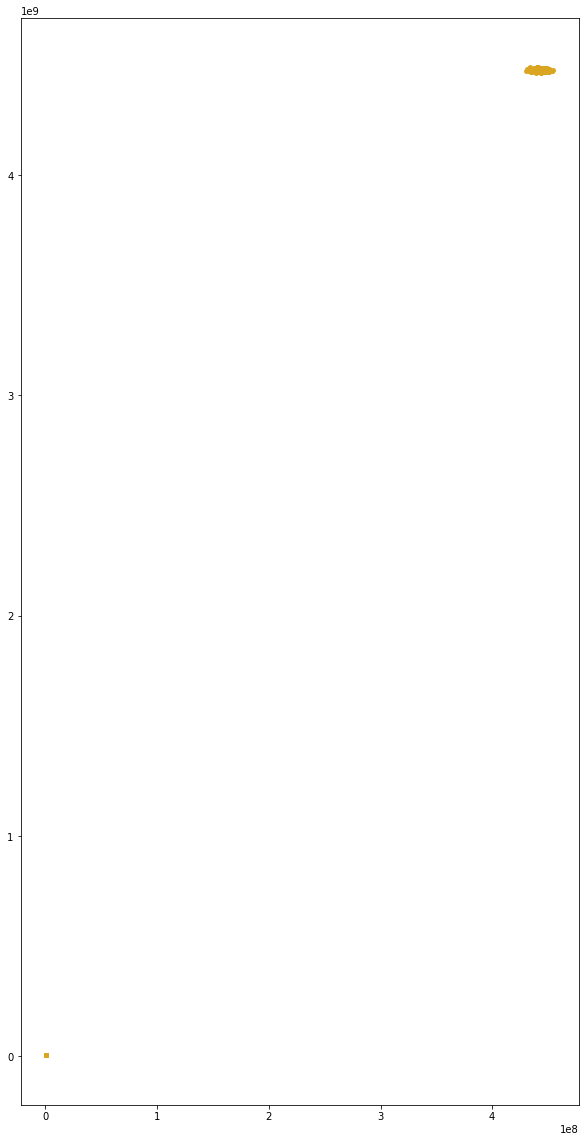

In [64]:
# with matplotlib
figure = plt.figure(figsize=(10,20))
plt.scatter(dfCoordenadas['longitud'], dfCoordenadas['latitud'], s=15, c='goldenrod')
plt.show()

C:\Users\javi4\AppData\Local\Temp/ipykernel_37152/2250391667.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wellLocCut = dfCoordenadas[dfCoordenadas['longitud'].between(-116.4,-116.0)][dfCoordenadas['latitud'].between(43.4,43.8)]


NameError: name 'mplleaflet' is not defined

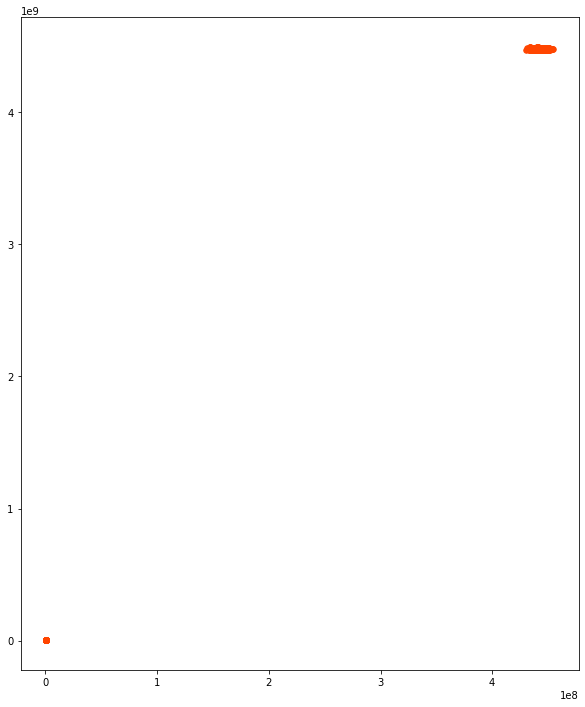

In [69]:
# with mplleaflet over a section of points
wellLocCut = dfCoordenadas[dfCoordenadas['longitud'].between(-116.4,-116.0)][dfCoordenadas['latitud'].between(43.4,43.8)]


tiles=('http://mt0.google.com/vt/lyrs=s&hl=en&x=', 
       '<a href=https://www.openstreetmap.org/about">© OpenStreetMap</a>')
#wellCrs = dfCoordenadas.crs
figure = plt.figure(figsize=(10,12))
plt.scatter(dfCoordenadas['longitud'], dfCoordenadas['latitud'], s=30, c='orangered')
mplleaflet.display(crs=None,tiles=tiles)

NameError: name 'mplleaflet' is not defined

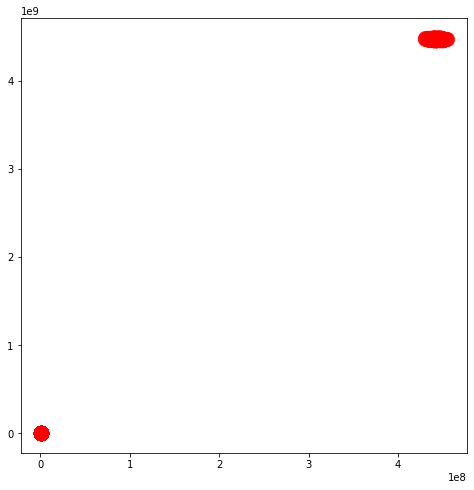

In [70]:
# Creamos la lista de latitudes y longitudes.
lats, lons = list(dfCoordenadas['latitud']), list(dfCoordenadas['longitud'])

In [81]:
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
plt.show()

NameError: name 'basemap' is not defined

In [86]:
dfBicis['num_edad'] = dfBicis['edad'].map({'Menor de 5 años':5, 'De 6 a 9 años':6, 'De 10 a 14 años':10, 'De 15 a 17 años':15,'De 18 a 20 años':18,'De 21 a 24 años':21, 'De 25 a 29 años':25, 'De 30 a 34 años':30, 'De 35 a 39 años':35, 'De 40 a 44 años':40, 'De 45 a 49 años':45, 'De 50 a 54 años':50, 'De 55 a 59 años':55, 'De 60 a 64 años':60, 'De 65 a 69 años':65, 'De 70 a 74 años':70, 'Más de 74 años':74})

In [87]:
dfBicis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13074 entries, 0 to 12187
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             13074 non-null  datetime64[ns]
 1   hora              13074 non-null  object        
 2   distrito          13074 non-null  object        
 3   accidente         13074 non-null  object        
 4   meteorología      13074 non-null  object        
 5   tipo_persona      13074 non-null  object        
 6   edad              13074 non-null  object        
 7   sexo              13074 non-null  object        
 8   lesividad         13074 non-null  object        
 9   coordenada_x_utm  13074 non-null  float64       
 10  coordenada_y_utm  13074 non-null  float64       
 11  alcohol           13074 non-null  object        
 12  droga             13074 non-null  float64       
 13  year              13074 non-null  int64         
 14  hour              1307

In [88]:
# Para variables ordenales usamos la técnica one-hut
dfBicis.distrito.value_counts()

PUENTE DE VALLECAS     940
CENTRO                 905
CHAMARTÍN              895
SALAMANCA              890
CARABANCHEL            831
RETIRO                 752
FUENCARRAL-EL PARDO    740
CIUDAD LINEAL          736
MONCLOA-ARAVACA        713
ARGANZUELA             708
SAN BLAS-CANILLEJAS    640
CHAMBERÍ               640
TETUÁN                 608
LATINA                 554
HORTALEZA              523
USERA                  512
VILLAVERDE             370
MORATALAZ              351
VILLA DE VALLECAS      326
BARAJAS                230
VICÁLVARO              210
Name: distrito, dtype: int64

In [103]:
# Creamos las variables binarias
dummiesDistrito = pd.get_dummies(dfBicis['distrito'])
dummiesDistrito.head()

,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTÍN,CHAMBERÍ,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,LATINA,...,MORATALAZ,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS-CANILLEJAS,TETUÁN,USERA,VICÁLVARO,VILLA DE VALLECAS,VILLAVERDE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Añadimos las variables binarias al DataFrame
dfBicisML = pd.concat([dfBicisML,dummiesDistrito], axis = 1)


In [93]:
dfBicisML = pd.DataFrame({'edad': dfBicis['num_edad'],
                          'año': dfBicis['year'],
                         'hora':dfBicis['hour'],
                         'dia':dfBicis['diaSemana']})

In [102]:
# Creamos las variables binarias
dummiesMeteorología = pd.get_dummies(dfBicis['meteorología'])
dummiesMeteorología.head()

,Despejado,LLuvia intensa,Lluvia débil,Nublado,Se desconoce
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [105]:
dfBicisML = pd.concat([dfBicisML,dummiesMeteorología], axis = 1)

In [106]:
# Creamos las variables binarias
dummiesaccidente = pd.get_dummies(dfBicis['accidente'])
dummiesaccidente.head()

,Alcance,Atropello a animal,Atropello a persona,Caída,Choque contra obstáculo fijo,Colisión frontal,Colisión fronto-lateral,Colisión lateral,Colisión múltiple,Otro,Solo salida de la vía,Vuelco
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [107]:
dfBicisML = pd.concat([dfBicisML,dummiesaccidente], axis = 1)

In [108]:
# Creamos las variables binarias
dummieslesividad = pd.get_dummies(dfBicis['lesividad'])
dummieslesividad.head()

,Asistencia sanitaria ambulatoria con posterioridad,Asistencia sanitaria inmediata en centro de salud o mutua,Asistencia sanitaria sólo en el lugar del accidente,Atención en urgencias sin posterior ingreso,Fallecido 24 horas,Ingreso inferior o igual a 24 horas,Ingreso superior a 24 horas,Se desconoce,Sin asistencia sanitaria
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0


In [109]:
dfBicisML = pd.concat([dfBicisML,dummieslesividad], axis = 1)

In [110]:
dfBicisML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13074 entries, 0 to 12187
Data columns (total 71 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   edad                                                       13074 non-null  int64
 1   año                                                        13074 non-null  int64
 2   hora                                                       13074 non-null  int64
 3   dia                                                        13074 non-null  int64
 4   BARAJAS                                                    13074 non-null  uint8
 5   CARABANCHEL                                                13074 non-null  uint8
 6   CENTRO                                                     13074 non-null  uint8
 7   CHAMARTÍN                                                  13074 non-null  uint8
 8   CHAMBERÍ                  

In [116]:
corr=dfBicisML.corr()
corr.style.background_gradient (cmap = 'coolwarm')

KeyError: '`Styler.apply` and `.applymap` are not compatible with non-unique index or columns.'

Index(['BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTÍN', 'CHAMBERÍ',
       'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA', 'LATINA',
       'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS', 'RETIRO',
       'SALAMANCA', 'SAN BLAS-CANILLEJAS', 'TETUÁN', 'USERA', 'VICÁLVARO',
       'VILLA DE VALLECAS', 'VILLAVERDE', 'BARAJAS', 'CARABANCHEL', 'CENTRO',
       'CHAMARTÍN', 'CHAMBERÍ', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO',
       'HORTALEZA', 'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ',
       'PUENTE DE VALLECAS', 'RETIRO', 'SALAMANCA', 'SAN BLAS-CANILLEJAS',
       'TETUÁN', 'USERA', 'VICÁLVARO', 'VILLA DE VALLECAS', 'VILLAVERDE',
       'Se desconoce', 'Se desconoce'],
      dtype='object')


ValueError: Need to specify at least one of 'labels', 'index' or 'columns'